# Indian Premier League Data Analysis 

![Jovian logo](https://res-1.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_170,w_170,f_auto,b_white,q_auto:eco/sxyvvsjkimveb6pdhdze)
![freeCodeCamp logo](https://i0.wp.com/softwareengineeringdaily.com/wp-content/uploads/2017/01/freecodecamp.jpeg?w=720&ssl=1)
![IPL logo](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTHTQi-kFMvj2igXLs672GWWRo3yyGxdjMfRg&usqp=CAU)

This notebook provides the data analysis of matches that have taken place in Indian Premier League (IPL) from 2008 to 2019. The dataset used in this analysis is taken from https://www.kaggle.com/nowke9/ipldata. Once downloaded, there are two different datasets. One having information about the matches and the results (*matches.csv*). The other one has ball-by-ball data for all seasons (*deliveries.csv*). For this project, I have analysed the data from *matches.csv*. 

The analysis done in this project is from a historical point of view, giving readers an overview of what has happended in the IPL. Tools such as *Pandas*, *Matplotlib* and *Seaborn* along with *Python* have been used to give a visual as well as numeric representation of the data in front of us.

The learnings about these tools have been received through the course [Data Analysis with Python: Zero to Pandas](http://zerotopandas.com) conducted by [Jovian.ml](https://jovian.ml). The course was offered at no cost and made my journey of learning really easy and interesting. The course was done in partnership with [freeCodeCamp](https://www.freecodecamp.org).

## How to run the code

This is an executable Jupyter notebook hosted on [Jovian.ml](https://jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: using free online resources (recommended) or on your own computer.

#### Option 1: Running using free online resources (1-click, recommended)


The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".

#### Option 2: Running on your computer locally


1. Install Conda by [following these instructions](https://jovian.ml/outlink?url=https%3A%2F%2Fconda.io%2Fprojects%2Fconda%2Fen%2Flatest%2Fuser-guide%2Finstall%2Findex.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

`conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade`

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

`jovian clone notebook-owner/notebook-id`

4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

`jupyter notebook`

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
!pip install pandas --upgrade

Requirement already up-to-date: pandas in c:\users\s\anaconda3\envs\courseproject\lib\site-packages (1.1.2)


In [3]:
!pip install matplotlib seaborn --upgrade --quiet

In [1]:
#Importing the libraries (tools) to be used
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


## Data Preparation and Cleaning

Let's load the CSV files using the Pandas library. We'll use the name `matches_raw_df` for the data frame, to indicate that this is unprocessed data that which we might clean, filter and modify to prepare a data frame that's ready for analysis.

We will read the *matches.csv* file using `read_csv()`.

In [14]:
matches_raw_df = pd.read_csv('matches.csv')

In [15]:
matches_raw_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [16]:
# know the no. of rows and columns using shape
matches_raw_df.shape

(756, 18)

So, the dataset has 756 rows (matches) and 18 columns. Let's find the names of those columns.

In [17]:
#Getting the list of columns
matches_raw_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [18]:
#Know the no. of columns using len
len(matches_raw_df.columns)

18

In [19]:
#Know about data
matches_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [20]:
#Using isnull() to find the columns having null values
#Using sum() to find the total no. of null values for each column
matches_raw_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Almost all columns except `umpire3` have none or very few null values. The null values coud be because of no information or wrong data entry. One thing that catches my eyes is the fact that though there are no null values for `result` columns, there are some for `winner` and `player_of_match`. Let's find out why.

In [21]:
#Using value_counts() on result to find the different values in the result column and their total no.
matches_raw_df.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

So, out of 756 matches 4 ended as *no result*, mainly due to rain. Therefore, we have no winners as well as player of the match for these 4 matches.

In [22]:
#Few stats about columns with integer type data
matches_raw_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


For our analysis, `umpire3` column isn't needed. So we will drop the column using `drop()` by passing the column name and axis value.

In [23]:
matches_df = matches_raw_df.drop('umpire3', axis = 1)

In [24]:
matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


We will use `matches_df` for our analysis from here on.

In [20]:
import jovian

In [21]:
jovian.commit(project = 'ipl data analysis', files = ['matches.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "srijansrj5901/ipl-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/srijansrj5901/ipl-data-analysis


'https://jovian.ml/srijansrj5901/ipl-data-analysis'

## Exploratory Analysis and Visualization

### Matches

Let's found how many matches have been played in the IPL each of the season from 2008 to 2019.

We will group the rows by season using `groupby()` and then count the no. of matches for each season using `count()` on `id`.

In [24]:
matches_per_season = matches_df.groupby('season').id.count()

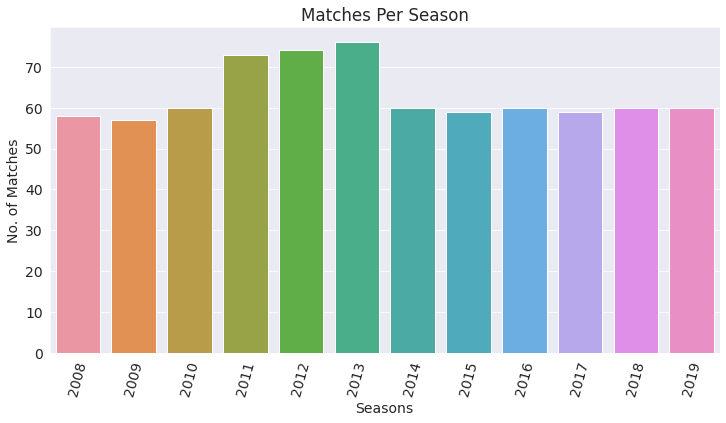

In [25]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Matches Per Season')
match_per_season_plot = sns.barplot(x = matches_per_season.index, y = matches_per_season)
match_per_season_plot.set(xlabel = 'Seasons', ylabel = 'No. of Matches');

Each season, almost 60 matches have been played. However, we see a spike in the number of matches from 2011 to 2013. This is due to the fact that two new franchises, **Pune Warrior** and **Kochi Tuskers Kerala** were introduced, increasing the number of teams to 10.

However, Kochi was removed in the very next season, while Pune Warriors were removed in 2013, bringing the number down to 8 from 2014. 

Before the start of 2016 season, two teams, **Chennai Super Kings** and **Rajasthan Royals** were banned for two seasons. To make up for them two new teams, **Rising Pune Supergiants** and **Gujarat Lions** entered the competition.

When Chennai Super Kings and Rajasthan Royals returned, these two teams were removed from the competition.

## Toss

One of the most significant happenings in any cricket match is the toss, which happens at the very start of a match. The toss winner can choose whether he wants to bat first or second. Let's see what teams have chosen to do across differrent seasons after winning the toss.

We will again group the rows by season and then count the different values of `toss_decision` by using `value_counts()`. To find the percentage, we will divide the above result with `matches_per_season`.

In [26]:
toss_decision_percentage = matches_df.groupby('season').toss_decision.value_counts().sort_index() / matches_per_season * 100

In [27]:
toss_decision_percentage

season  toss_decision
2008    bat              44.827586
        field            55.172414
2009    bat              61.403509
        field            38.596491
2010    bat              65.000000
        field            35.000000
2011    bat              34.246575
        field            65.753425
2012    bat              50.000000
        field            50.000000
2013    bat              59.210526
        field            40.789474
2014    bat              31.666667
        field            68.333333
2015    bat              42.372881
        field            57.627119
2016    bat              18.333333
        field            81.666667
2017    bat              18.644068
        field            81.355932
2018    bat              16.666667
        field            83.333333
2019    bat              16.666667
        field            83.333333
dtype: float64

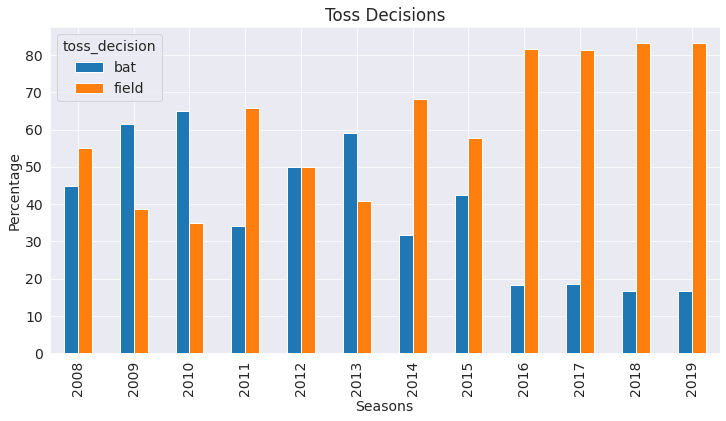

In [28]:
toss_decision_percentage.unstack().plot(kind = 'bar', figsize=(12,6), title = 'Toss Decisions', xlabel = 'Seasons', ylabel = 'Percentage');

Interesting!

For 2008-2013, teams seem to have been favouring both batting first and second. For this period, the percentage of times batting first was chosen is more in seasons 2009, 2010 and 2013. While fielding was chosen more in 2008 and 2011. Things were even stevens for 2012.

This could be put to the fact that IPL and T20 cricket in general was in its budding stages. So, teams were probably learning and trying to figure out which would favour them. 

However, since 2014, teams have overwhelmingly chosen to bat second. Especially since 2016, teams have chosen to field for **more than 80%** of the times.

With the use of data analysis and an incresing trend in ODIs to bat second as there is a fixed target to achieve, teams chose more and more to bat first. This made the batsmen tasks easier as they could now have a clear thought of how to scale the target put in front of them.

## Wins

We saw how teams in the recent past have chosen to bat second more than 4 out of 5 times. Did this decision of theirs tranformed in results? Let's see

We will filter the dataframe using the required consitions, then grouping them by season and finding the count of winners.

In [30]:
wins_batting_second = matches_df[(matches_df.win_by_runs == 0) & (matches_df.result == 'normal')].groupby('season').winner.count() / matches_per_season * 100

In [31]:
wins_batting_first = matches_df[(matches_df.win_by_wickets == 0) & (matches_df.result == 'normal')].groupby('season').winner.count() / matches_per_season * 100

In [32]:
combined_wins_df = pd.concat([wins_batting_first, wins_batting_second], axis = 1)
combined_wins_df.columns = ['batting_first', 'batting_second']
combined_wins_df

,batting_first,batting_second
season,,
2008,41.379310,58.620690
2009,47.368421,50.877193
2010,51.666667,46.666667
2011,45.205479,53.424658
2012,45.945946,54.054054
2013,48.684211,48.684211
2014,36.666667,61.666667
2015,54.237288,40.677966
2016,35.000000,65.000000


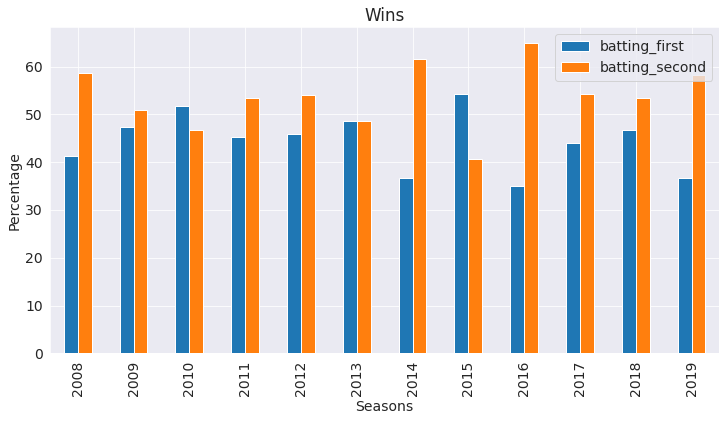

In [33]:
combined_wins_df.plot(kind = 'bar', figsize=(12,6), title = 'Wins', xlabel = 'Seasons', ylabel = 'Percentage');

We saw earlier that for 2008-2013, teams were in conundrum to chose bat first or second. This is partially visisble in the results as well. The wins from batting first are very close to that from batting second. However, there is just one season where teams batting first won more, with things being equal in 2013. 

Again, since 2014, things have been in favour of teams chasing except 2015. Leaving out 2015, things have been overwhelmingly in favour of teams batting second.

So, teams chosing batting second more have been justified in their decisions.

## Teams with "History"

In leagues across different sports, there is always a talk about teams with "history" as in teams that have played the most in the league and continue to do so. Let's find such teams in the IPL.

We will count the different values for `team1` and `team2` using `value_counts()` and sort them in descending order using `sort_values()`.

In [34]:
total_matches_played = (matches_df.team2.value_counts() + matches_df.team1.value_counts()).sort_values(ascending = False)
total_matches_played

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
dtype: int64

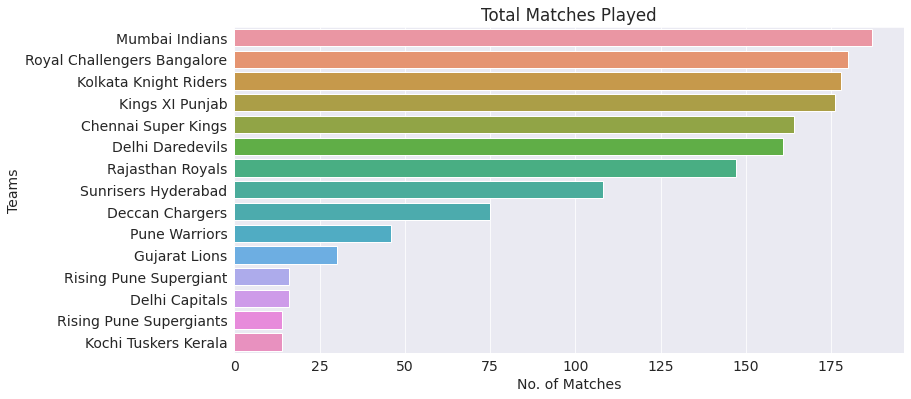

In [35]:
plt.figure(figsize=(12,6))
plt.title('Total Matches Played')
total_matches_played_plot = sns.barplot(y = total_matches_played.index, x = total_matches_played)
total_matches_played_plot.set(ylabel = 'Teams', xlabel = 'No. of Matches');

**Mumbai Indians** are the team that have played the most number of matches. They are followed by Royal Challengers Bangalore, Kolkata Knight Riders, Kings XI Punjab and Chennai Super Kings.

Chennai Super Kings and Rajasthan Royals could have been higher had they not been banned.

You will see there are two teams from Delhi, **Delhi Daredevils** and **Delhi Capitals**. This is due to the change in owners and team name in 2018.

Similar story for **Deccan Chargers** and **Sunrisers Hyderabad** with Deccan Chargers being removed from IPL from 2013 and Sunrisers coming in their place.

Also, there are two teams with almost same names. **Rising Pune Supergiants** and **Rising Pune Supergiant**. Well, they are same teams, no owners change. But it is more to do with superstitions.

In the 2016 season, Rising Pune Supergiants finished 7th. The owners changed the captain for 2017 as well as **dropped the 's'** from Supergiants. Well, it paid off as they finished as runner-up that season!!!

## Teams with "Legacy"

Now, teams may have a lot of history but it's their "legacy" i.e. how often they win that makes them popular and attract the new and neutral fans.

We will use `value_counts()` on `winner` to find the different winners and the no. of matches they have won. 

In [38]:
most_wins = matches_df.winner.value_counts()

In [39]:
most_wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

So Mumbai have the highest number of wins. But a better metric to judge would be the win percentage.

We will divide `most_wins` by `total_matches_played` to find the `win_percentage` for each team.

In [40]:
win_percentage = (most_wins / total_matches_played).sort_values(ascending = False) * 100
win_percentage

Rising Pune Supergiant         62.500000
Delhi Capitals                 62.500000
Chennai Super Kings            60.975610
Mumbai Indians                 58.288770
Sunrisers Hyderabad            53.703704
Kolkata Knight Riders          51.685393
Rajasthan Royals               51.020408
Royal Challengers Bangalore    46.666667
Kings XI Punjab                46.590909
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
dtype: float64

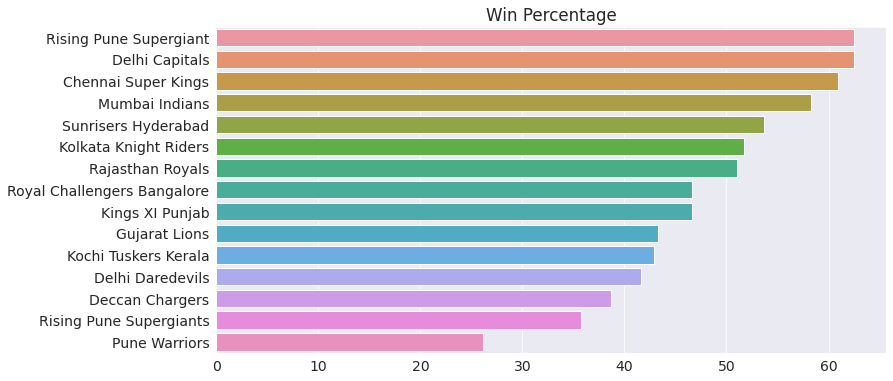

In [41]:
plt.figure(figsize=(12,6))
plt.title('Win Percentage')
win_percentage_plot = sns.barplot(y = win_percentage.index, x = win_percentage)
total_matches_played_plot.set(ylabel = 'Teams', xlabel = 'Percentage');

Rising Pune Supergiant and Delhi Capitals have the highest win percentage. This is largely due to the fact that they have played really few matches. Especially, Rising Pune Supergiant, who technically beacame a new team after leaving out the 's'.

Chennai Super Kings despite playing two less seasons than Mumbai Indians had only 9 less victories. They, along with Mumbai Indians are the only two teams in top 5 that were also part of IPL in 2008.

**Chennai** and **Mumbai** are the teams with legacy.

In [42]:
import jovian

In [45]:
jovian.commit(project = 'ipl data analysis', files = ['matches.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "srijansrj5901/ipl-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/srijansrj5901/ipl-data-analysis


'https://jovian.ml/srijansrj5901/ipl-data-analysis'

## Asking and Answering Questions

We now know few things about aour data. Let's know some more!!!

#### Q. Who have been the winners of IPL?

*Steps*:

* Using `groupby()` to group the rows according to seasons.
* Find the last match of each season i.e the final using `tail(1)`.
* Sort the values as per season using `sort_index()`.
* Count the different winners and the times they won using `value_counts()` on `winner`.

In [46]:
ipl_win = matches_df.groupby('season').tail(1).sort_values('season', ascending = True)
ipl_win

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi


In [47]:
ipl_winners = ipl_win.winner.value_counts()
ipl_winners

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Deccan Chargers          1
Name: winner, dtype: int64

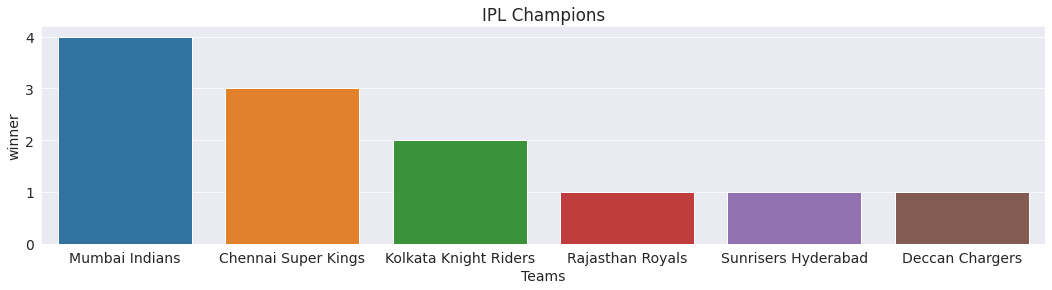

In [49]:
plt.figure(figsize=(18, 4))
plt.xlabel('Teams')
plt.ylabel('No. of Times')
plt.title('IPL Champions')
sns.barplot( x  = ipl_winners.index, y = ipl_winners);

Mumbai and Chennai, our *legacy* teams, have won the IPL atleast 3 times. Sunrisers Hyderabad are the only team that have joined the league later and have won the trophy. 

#### Q. Which have been the most and the least consistent teams across all seasons? 

*Steps*:

 * Use crosstab() to create a data frame between different values of `winner` and `season`.
 * Plot the same as a heatmap.

In [28]:
matches_won_each_season = pd.crosstab(matches_df['winner'], matches_df['season'])

In [30]:
matches_won_each_season

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
winner,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0
Delhi Capitals,0,0,0,0,0,0,0,0,0,0,0,10
Delhi Daredevils,7,10,7,4,11,3,2,5,7,6,5,0
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7,6,6
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11


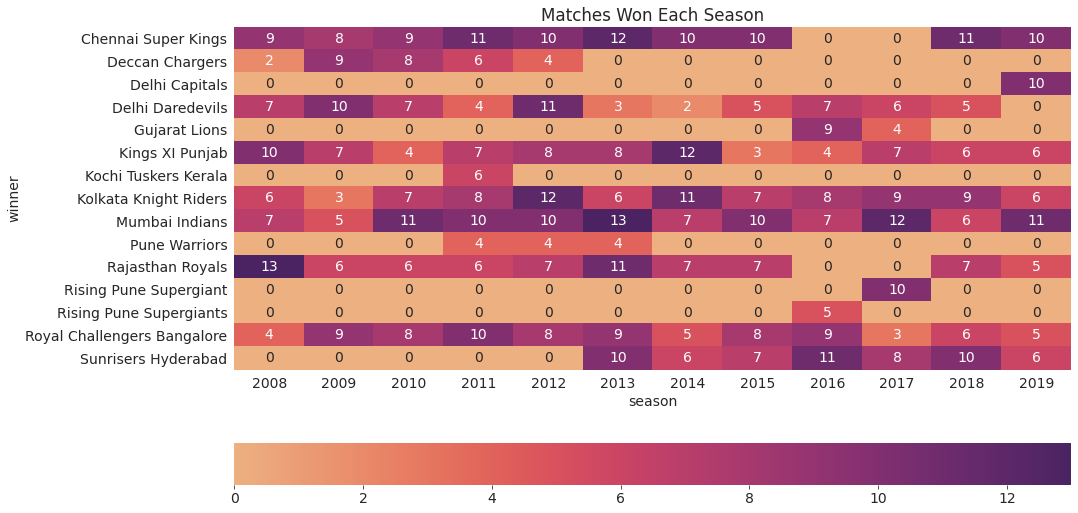

In [55]:
plt.figure(figsize=(15, 9))
plt.xlabel('Seasons')
plt.ylabel('Teams')
plt.title('Matches Won Each Season')
sns.heatmap(matches_won_each_season, annot = True, cmap = 'flare', fmt = 'd', cbar_kws={"orientation": "horizontal"});

**Chennai Super Kings** have been the most consistent team, winning atleast 8 matches in each of the season they have played. This is backed up by the fact that they are the **only** team to reach the playoffs satage every season.

At the other end of the spectrum are 3 teams. **Delhi Daredevils**, **Kings XI Punjab** and **Rajasthan Royals**. All three of them have had two seasons, where they have performed really well. However, they have been pretty average in rest of the seasons by far.

#### Q. Which team has been the luckiest (won most no. of tosses) over the seasons?

*Steps*:

* Using `groupby()` to group the rows according to seasons.
* Find the different toss winners and how many times they won for every season by using `value_counts()` on `toss_winner`.

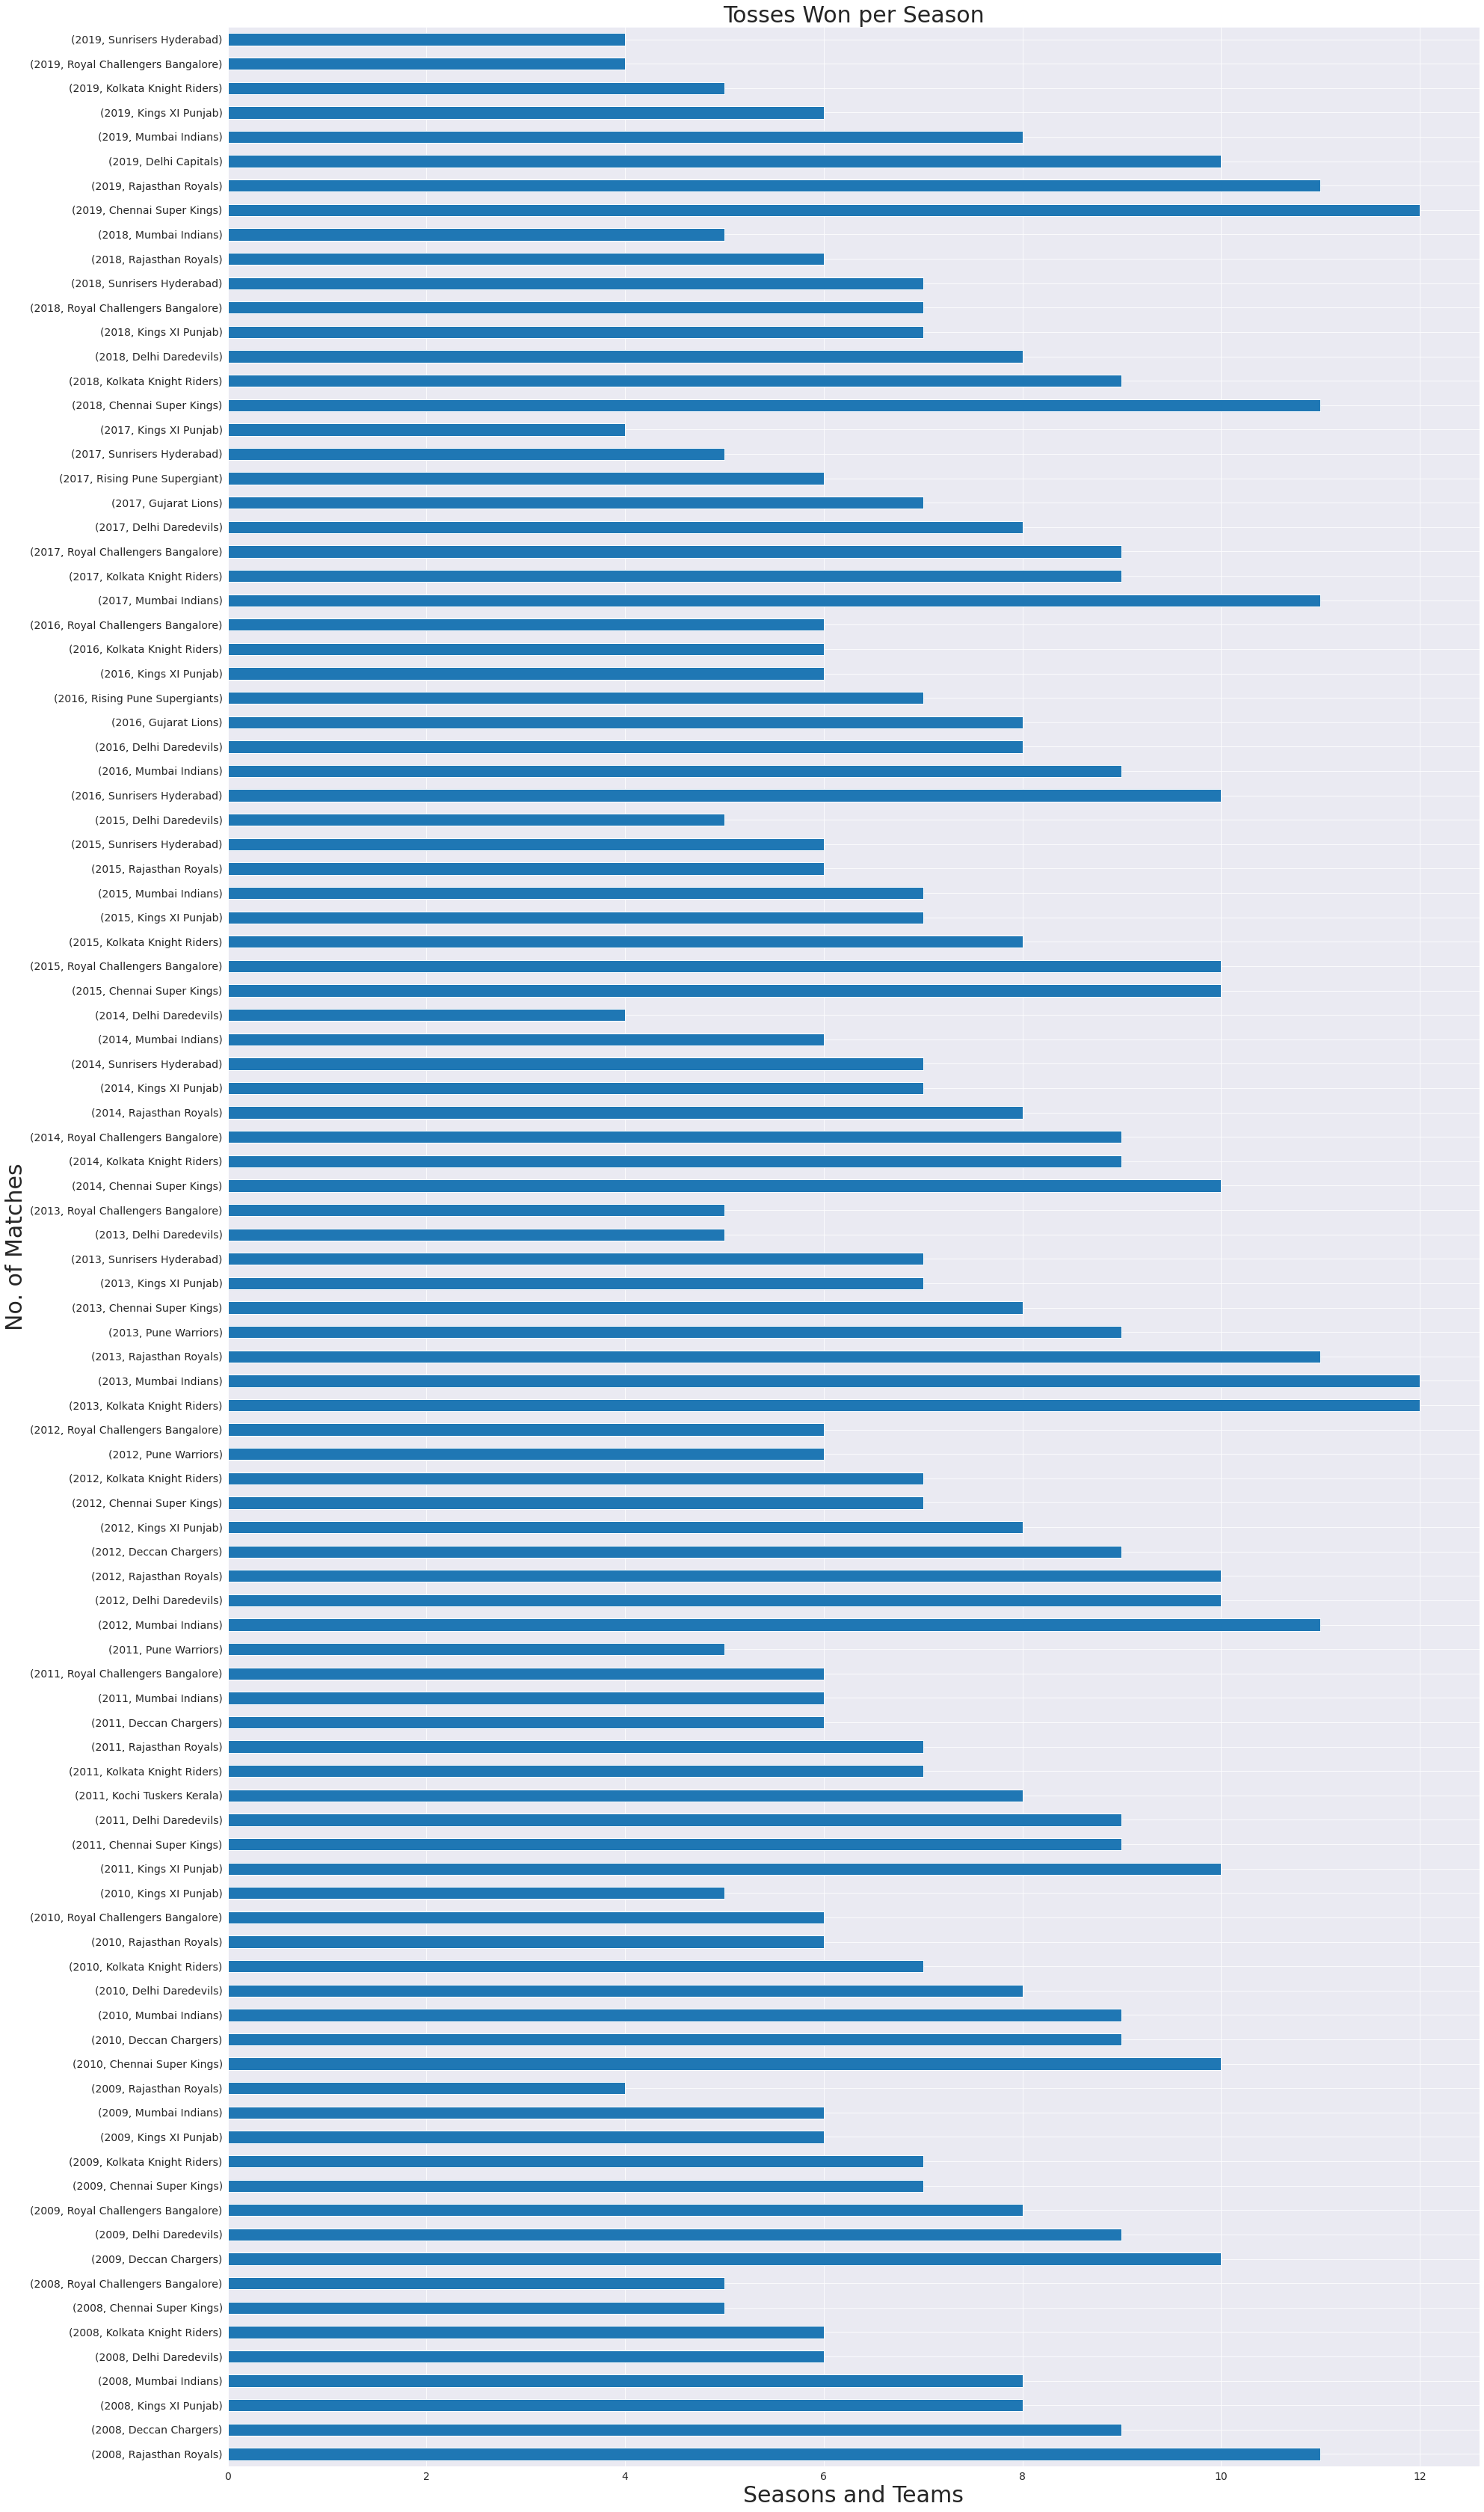

In [50]:
matches_df.groupby('season').toss_winner.value_counts().plot(kind ='barh', figsize = (30, 60))
plt.title('Tosses Won per Season', size = 30)
plt.xlabel('Seasons and Teams', size = 30)
plt.ylabel('No. of Matches', size = 30);

#Double Click on the graph below to zoom

Except 2012, 2015 and 2019, the IPL winning teams have been amongst the top two in terms of toss win percentage. In 2012 and 2015, Kolkata Knight Riders and Mumbai Indians were 6th best (won 7) in winning tosses while in 2019 Mumbai were 4th best (won 8).

**Kolkata** and **Mumbai** in 2013 and **Chennai** in 2019 have won the most no. of tosses in a season - 12.

#### Q. What has been the largest margin of victory in IPL?

In cricket, teams can win by runs or wickets. We will look at both the scenarios.

*Steps*:

* Filter the dataframe using the required consition.
* Sort the values in descending order.
* Find the top 10 in the list using `head(10)`.

In [51]:
highest_wins_by_runs_df = matches_raw_df[matches_raw_df.win_by_runs != 0].sort_values('win_by_runs', ascending = False)
highest_wins_by_runs_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
556,557,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
410,411,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
614,615,2016,Chandigarh,2016-05-09,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,1,0,SR Watson,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,HDPK Dharmasena,NaN
598,599,2016,Delhi,2016-04-27,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Gujarat Lions,1,0,CH Morris,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
163,164,2009,Johannesburg,2009-05-17,Kings XI Punjab,Deccan Chargers,Deccan Chargers,field,normal,0,Kings XI Punjab,1,0,Yuvraj Singh,New Wanderers Stadium,S Ravi,RB Tiffin,NaN


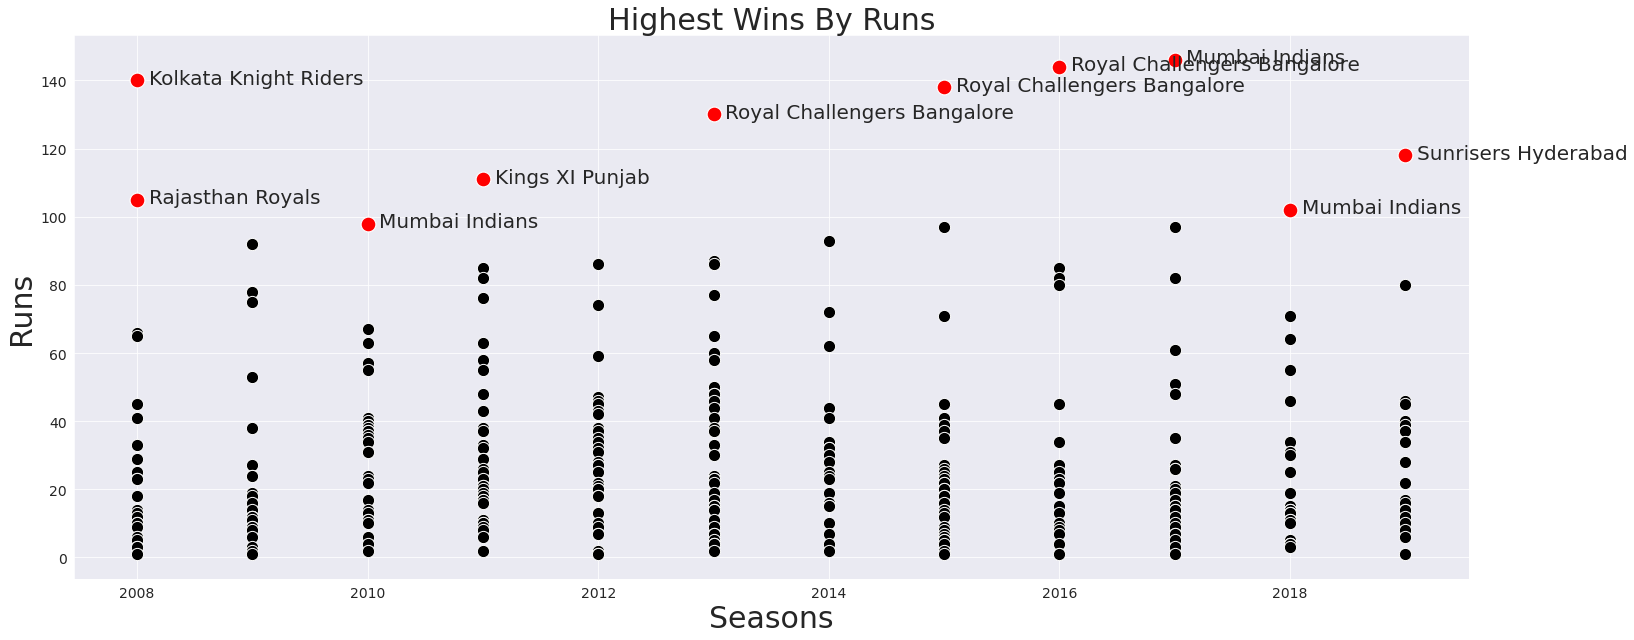

In [52]:
plt.figure(figsize=(25, 10))
plt.xlabel('Seasons',size=30)
plt.ylabel('Runs',size=30)
plt.title('Highest Wins By Runs', size = 30)
sns.scatterplot(x = 'season',y =  'win_by_runs', data = highest_wins_by_runs_df, s =150, color = 'black');
sns.scatterplot(x = 'season',y =  'win_by_runs', data = highest_wins_by_runs_df.head(10), s =220, color = 'red');
for i in range(highest_wins_by_runs_df.head(10).shape[0]):
    plt.annotate(highest_wins_by_runs_df.winner.tolist()[i], (highest_wins_by_runs_df.season.tolist()[i]+0.1, highest_wins_by_runs_df.win_by_runs.tolist()[i] - 1) , size = 20)

The biggest margin of victory by runs is **146 runs**. In 2017 season, Mumbai Indians defeated Delhi Daredevils by this margin. Royal Challengers Bangalore have 3 victories amongst top 5, mainly because of having the services of arguably the best top 3 batsmen ever assembled in a T20 team.

If we look at margin of victories by wickets, it is fairly common to chase a total with all the wickets remaining. The top 10 wins in the below list have margin of victories as **10 wickets**.

In [53]:
largest_wins_by_wickets = matches_raw_df.sort_values('win_by_wickets', ascending = False).head(10)

In [54]:
largest_wins_by_wickets

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,NaN
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
683,7941,2018,Indore,14/05/18,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,UT Yadav,Holkar Cricket Stadium,Bruce Oxenford,Virender Kumar Sharma,O Nandan
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN


#### Q. Who have been the biggest match-winners in the IPL?

Finding the players with the most no. of *player of the match* award will be equivalent to finding the match- winning players.

*Steps*:

* Find different players who have won player of the match award and how many times they have won using `value_counts()` on `player_of_match`.
* Find the top 10 in the series using `head(10)`.

In [55]:
match_winners = matches_df.player_of_match.value_counts().head(20)
match_winners

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
V Kohli           12
MEK Hussey        12
A Mishra          11
V Sehwag          11
DR Smith          11
AD Russell        11
KA Pollard        10
JH Kallis         10
AT Rayudu          9
SE Marsh           9
Name: player_of_match, dtype: int64

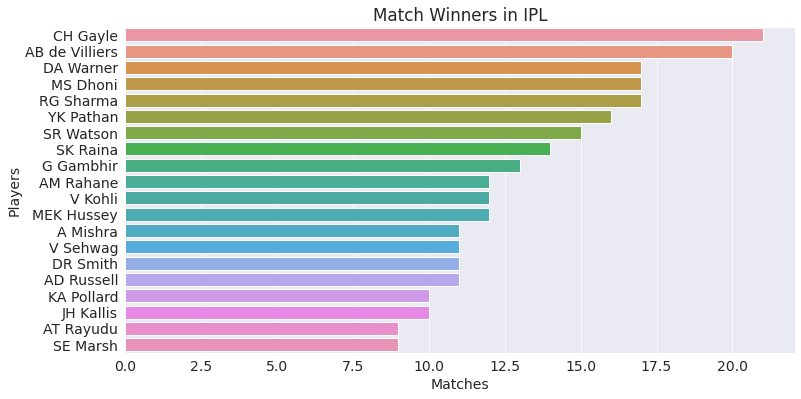

In [56]:
plt.figure(figsize=(12,6))
plt.title('Match Winners in IPL')
match_winners_plot = sns.barplot(x = match_winners, y = match_winners.index)
match_winners_plot.set(ylabel = 'Players', xlabel = 'Matches');

**CH Gayle** and **AB de Villiers**, two of the greatest T20 batsmen of all time have a clear lead over others. The fact that there are only two bowlers Amit Mishra and Sunil Narine in the list, shows how bowlers are under-valued in the minds of the people and T20 cricket in general. Though, this has been changing in recent years with the use of advanced metrics.

#### Q. Which stadiums have staged IPL matches the most?

*Steps*:

* Find different venues and the no. of matches held using `value_counts()` on `venue`.
* Sort the values in ascending order and use `tail(10)` to find the highest 10 in the series. 

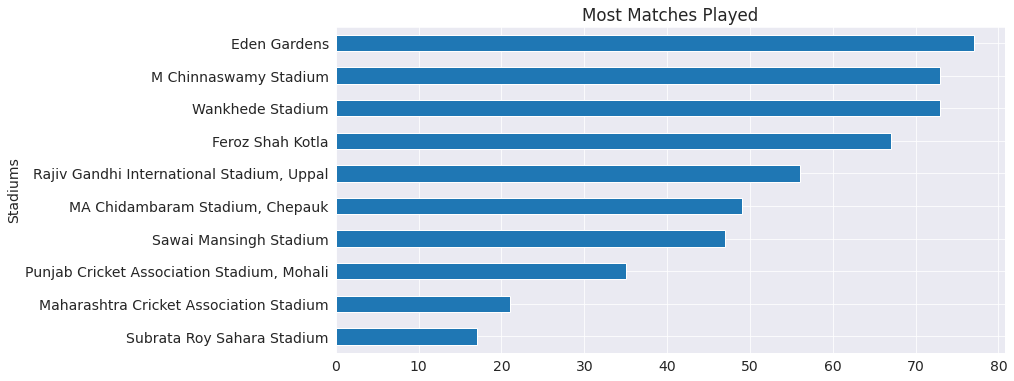

In [60]:
matches_df.venue.value_counts().sort_values().tail(10).plot(kind = 'barh', figsize = (12, 6), ylabel = 'Matches', xlabel = 'Stadiums', title = 'Most Matches Played');

**Eden Gardens**, home to Kolkata Knight Riders has hosted the most no. of IPL matches. This is followed closely by Chinnaswamy Stadium and Wankhede Stadium, both home to Royal Challengers Bangalore and Mumbai Indians, respectively.

#### Q. Who have been the most experienced umpires?

IPL is known for the noise and pressure. And the pressure isn't just on players, but on umpires too. Umpiring in such evironment can be as taxing as anything with atleast 40,000 people screaming every match.

*Steps*:

* Find the different umpires and total no. of matches they umpired using `value_counts()` on `umpire1` and `umpire2` and adding them.
* Sort the series in descending order and find the top 10 using `head(10)`.

In [62]:
most_experienced_umpires = (matches_raw_df.umpire1.value_counts() + matches_raw_df.umpire2.value_counts()).sort_values(ascending = False).head(10)

In [63]:
most_experienced_umpires

S Ravi             106.0
HDPK Dharmasena     87.0
C Shamshuddin       73.0
AK Chaudhary        58.0
SJA Taufel          55.0
M Erasmus           54.0
Nitin Menon         42.0
BR Doctrove         42.0
RE Koertzen         41.0
CK Nandan           41.0
dtype: float64

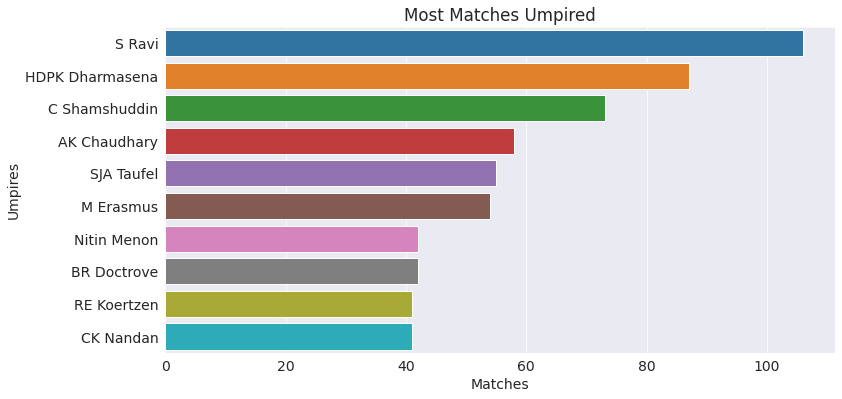

In [64]:
plt.figure(figsize=(12,6))
plt.title('Most Matches Umpired')
most_experienced_umpires_plot = sns.barplot(y = most_experienced_umpires.index, x = most_experienced_umpires)
most_experienced_umpires_plot.set(xlabel = 'Matches', ylabel = 'Umpires');

**S Ravi** has umpired for 106 matches, easily the most. He is follwed by Dharmasena on 87 matches.

#### Q. We have seen Mumbai Indians and Chennai Super Kings have been the two most successful sides in the IPL so far. Which team leads in their head-to-head record?

*Steps*:

* Filter the dataframe using the required condition to find the dataframe of matches played between the two teams.
* Use `value_counts()` on `winner` to find how many times each of the teams have won.

In [65]:
mivcsk_df = matches_df[((matches_df.team1 == 'Mumbai Indians') & (matches_df.team2 == 'Chennai Super Kings')) | ((matches_df.team1 == 'Chennai Super Kings') & (matches_df.team2 == 'Mumbai Indians')) ]

In [66]:
mivcsk_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar
95,96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba
117,118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan
161,162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel
193,194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba
210,211,2010,Chennai,2010-04-06,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel
256,257,2011,Mumbai,2011-04-22,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,8,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba
307,308,2012,Chennai,2012-04-04,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel
354,355,2012,Mumbai,2012-05-06,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,2,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani


In [67]:
mivcsk_df.result.shape

(28,)

In [68]:
mivcsk = mivcsk_df.winner.value_counts()
mivcsk

Mumbai Indians         17
Chennai Super Kings    11
Name: winner, dtype: int64

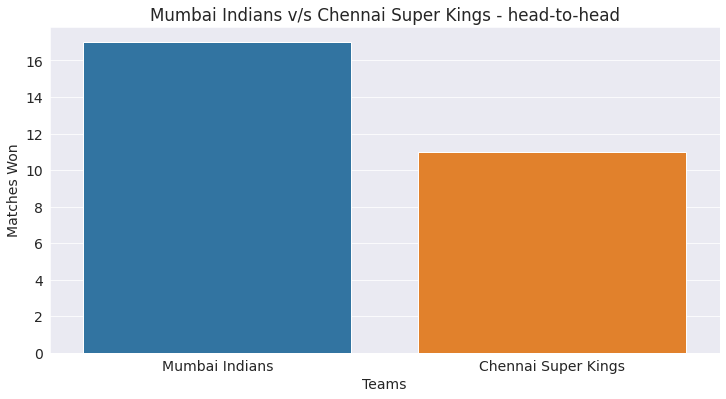

In [69]:
plt.figure(figsize=(12,6))
plt.title('Mumbai Indians v/s Chennai Super Kings - head-to-head')
mivcsk_plot = sns.barplot(x = mivcsk.index, y = mivcsk);
mivcsk_plot.set(xlabel = 'Teams', ylabel = 'Matches Won');

Mumbai have dominated CSK and are leading the head-to-head record 17-11. The dominance was especially seen in the 2019 season, where Mumbai defeated Chennai 4 out of 4 times they met, including the playoff and final.

In [70]:
mivcsk_df[mivcsk_df.season == 2019]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
710,11151,2019,Mumbai,03/04/19,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,37,0,HH Pandya,Wankhede Stadium,Bruce Oxenford,Rod Tucker
739,11335,2019,Chennai,26/04/19,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,46,0,RG Sharma,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould


#### Q. What is the number for close encounters i.e matches where the victory margn is 10 runs or less?

*Step*:

* Plot a histogram with `win_by_runs` in bins (bar) of 10 each till 150.

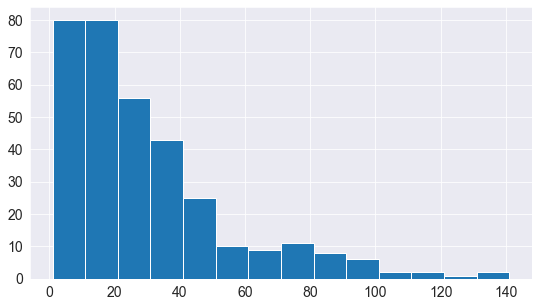

In [120]:
plt.hist(matches_df.win_by_runs, bins = np.arange(1, 150, 10));

There have been **80 matches** (excluding the ties) where the margin of victory has been 10 runs or less. This is pretty close since 10 runs is bascially two boundary shots away.

In [ ]:
import jovian

In [72]:
jovian.commit(project = 'ipl data analysis', files = ['matches.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "srijansrj5901/ipl-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/srijansrj5901/ipl-data-analysis


'https://jovian.ml/srijansrj5901/ipl-data-analysis'

## Inferences and Conclusions

We have drawn some interesting inferences and now know more about IPL than we started. Here's a summary of what all we came to know through our analysis:

* Almost 60 matches are played in every IPL season amongst 8 teams.

* There has been an attempt to expand the IPL to 10 teams (from 2011-2013), but the 8 teams idea was brought back and has been continued since.

* For the first six seasons (2008-2013), teams were figuring out whether batting first or chasing would be better after winning the toss. This could be down to the fact that the IPL and T20 cricket, both were in their early stages where teams were trying different strategies.

* But, since 2014, teams have preferred chasing, especially in the past 4 seasons (2016-2019), where teams have chosen to field more than 4 times out of 5. This can be put down to the fact that having a set total to chase makes things simpler. This can also be a result of teams preferring to chase in ODIs as well.

* Though teams have overwhelmingly chosen to field first, the win percentage after chosing to bat or field is not that one-sided. However, their difference is on the rise.

* Mumbai Indians have played the most no. of matches in the IPL. Due to the brief expansion (*see 2.*), change of owners, removal and banning of teams, there have been 15 teams who have played in the IPL.

* Chennai and Mumbai are the two teams with the highest win percentage. The fact that they are the only two teams that were part of the first season as well, in the top 5, shows their dominance.

* Mumbai Indians have the won the IPL 4 times, the most. They are followed by Chennai at 3 and Kolkata Knight Riders at 2. Sunrisers Hyderabad, Deccan Chargers and Rajasthan Royals complete the IPL Champions list, all winning once each.

* Except 2012, 2015 and 2019, the IPL winning teams have been amongst the top two in terms of toss win percentage every season. In 2012 and 2015, Kolkata Knight Riders and Mumbai Indians were 6th best (won 7) in winning tosses while in 2019 Mumbai were 4th best (won 8).

* 146 runs is the largest margin of victory by runs. Mumbai Indians defeated Delhi Daredevils by this margin in 2017. The largest margin for victory by wickets is 10, which has been achieved many-a-times.

* CH Gayle and AB de Viliers have been the two standout match-winners for their teams in the 12 seasons so far. They have won the player of the match award 21 and 20 times respectively.

* Eden Gardens has hosted the most no. of matches so far. S Ravi has umpired the most no. of matches till now.

* There have been 80 matches (excluding the ties) where the margin of victory has been 10 runs or less. This is pretty close since 10 runs is bascially two boundary shots away.

* The two heavyweights, Mumbai and Chennai have a head-to-head record in favour of Mumbai at 17-11. Mumbai have had the upperhand in the 2019 season every time they met, including the final.

## References and Future Work

We have done a whole bunch of analysis but there's more to be taken. Few other areas that can be explored:

* Head-to-head records of various teams.
* Which teams prefer to bat first and which team batting second?
* The performance of various teams at their home ground
* Going through *deliveries.csv* and combining it with *matches.csv* to do more in-depth analysis and machine learning models.

References:

* Kaggle Dataset - https://www.kaggle.com/nowke9/ipldata
* Stack Overflow - https://www.stackoverflow.com
* Matplotlib Documentation -  https://matplotlib.org/3.3.1/users/index.html
* Pandas - https://pandas.pydata.org/docs/user_guide/index.html

And Google!!! If you are stuck anywhere, just put in the search bar. Chances are many other people have been in the same situation as well and have been helped by others. So, just google it.

Also, the IPL is on right now. Watch it and enjoy!!!

In [58]:
import jovian

In [ ]:
jovian.commit(project = 'ipl data analysis', files = ['matches.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
